In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid



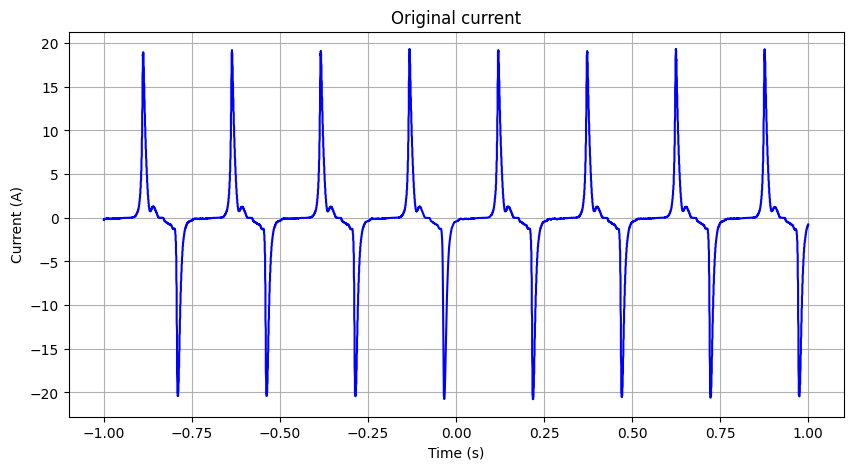

In [52]:
# 파일 경로 설정 (실제 CSV 파일 경로 입력)
file_path = "data/0M teng 2.csv"

# CSV 파일 불러오기
df = pd.read_csv(file_path, header=None)
df.columns = ["Time", "Current"]

# 데이터 형식 변환
df["Time"] = pd.to_numeric(df["Time"], errors='coerce')
df["Current"] = pd.to_numeric(df["Current"], errors='coerce')

# 1. 전체 데이터 플로팅
plt.figure(figsize=(10, 5))
plt.plot(df.iloc[:, 0], df.iloc[:, 1], label="AC current", color='b')
plt.xlabel("Time (s)")
plt.ylabel("Current (A)")
plt.title("Original current")
#plt.legend()
plt.grid(True)
plt.show()


양수 전하 값: 0.2517 C
음수 전하 값: -0.2880 C


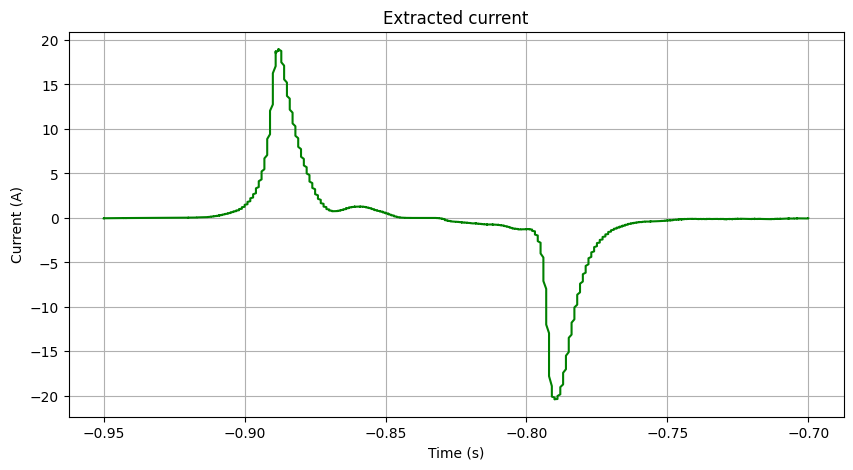

In [53]:
# 2. 특정 범위 선택
time_range = (-0.95, -0.7) #unit = sec
df_filtered = df[(df.iloc[:, 0] >= time_range[0]) & (df.iloc[:, 0] <= time_range[1])]

# 3. 양수 및 음수 전류값 분리
df_positive = df_filtered[df_filtered.iloc[:, 1] > 0]
df_negative = df_filtered[df_filtered.iloc[:, 1] < 0]

# 4. 적분을 위한 시간과 전류값 배열 생성
time_positive = df_positive.iloc[:, 0].values
current_positive = df_positive.iloc[:, 1].values

time_negative = df_negative.iloc[:, 0].values
current_negative = df_negative.iloc[:, 1].values

# 5. 양수/음수 적분 (전하 계산)
charge_positive = cumulative_trapezoid(current_positive, time_positive, initial=0)[-1] if len(time_positive) > 1 else 0
charge_negative = cumulative_trapezoid(current_negative, time_negative, initial=0)[-1] if len(time_negative) > 1 else 0

print(f"양수 전하 값: {charge_positive:.4f} C")
print(f"음수 전하 값: {charge_negative:.4f} C")

plt.figure(figsize=(10, 5))
plt.plot(df_filtered.iloc[:, 0], df_filtered.iloc[:, 1], label="Filtered Current", color='g')
plt.xlabel("Time (s)")
plt.ylabel("Current (A)")
plt.title("Extracted current")
#plt.legend()
plt.grid(True)
plt.show()


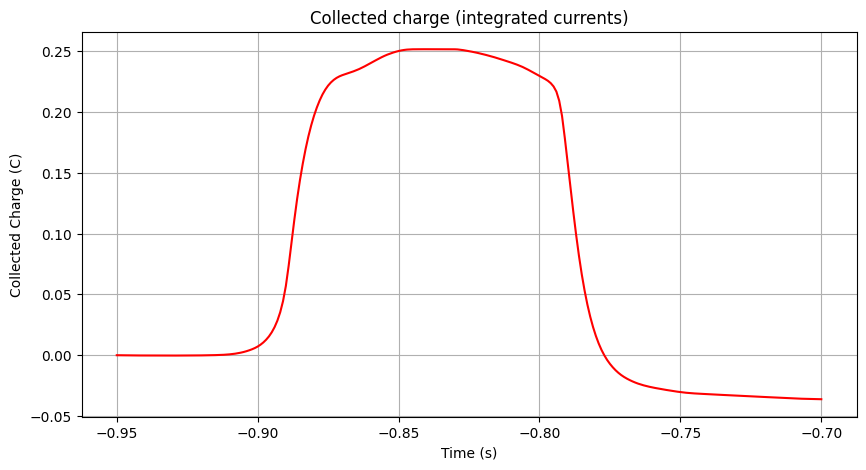

In [54]:
# 6. 중첩 적분 수행 (누적 전류)
cumulative_charge = cumulative_trapezoid(df_filtered.iloc[:, 1], df_filtered.iloc[:, 0], initial=0)

# 7. 중첩 적분 결과 플로팅
plt.figure(figsize=(10, 5))
plt.plot(df_filtered.iloc[:, 0], cumulative_charge, label="Cumulative Charge", color='r')
plt.xlabel("Time (s)")
plt.ylabel("Collected Charge (C)")
plt.title("Collected charge (integrated currents)")
#plt.legend()
plt.grid(True)
plt.show()